In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
ispu = pd.read_excel ("ISPU Jakarta.xlsx",sheet_name="Sheet1")

In [2]:
#Mencetak 5 baris pertama
ispu.head()


Tanggal  PM10  PM25   SO2    CO     O3   NO2
0 2018-01-01  76.0   NaN  31.0  38.0   35.0   9.0
1 2018-01-02  23.0   NaN  31.0  24.0   39.0  14.0
2 2018-01-03  53.0   NaN  35.0  35.0  101.0  23.0
3 2018-01-04  53.0   NaN  49.0  34.0   57.0  15.0
4 2018-01-05  44.0   NaN  32.0  26.0   28.0  10.0

In [3]:
#Menghitung persentase nilai yang hilang (missing values)
ispu.isna().sum()/len(ispu)*100

Tanggal     0.000000
PM10        0.332226
PM25       59.911406
SO2         0.885936
CO          0.332226
O3          0.110742
NO2         0.276855
dtype: float64

In [4]:
#Menghapus variabel yang mengandung missing values lebih dari 30%
ispu2 = ispu.drop(['PM25'], axis = 1)

In [5]:
#Menampilkan data setelah variabel PM25 dihapus
ispu2.head()

Tanggal  PM10   SO2    CO     O3   NO2
0 2018-01-01  76.0  31.0  38.0   35.0   9.0
1 2018-01-02  23.0  31.0  24.0   39.0  14.0
2 2018-01-03  53.0  35.0  35.0  101.0  23.0
3 2018-01-04  53.0  49.0  34.0   57.0  15.0
4 2018-01-05  44.0  32.0  26.0   28.0  10.0

In [6]:
#Mengisi missing values menggunakan metode forward fill ffill() dan backward fill bfill()
ispu2 = ispu2.ffill()
ispu2 = ispu2.bfill()

In [7]:
#Memeriksa apakah masih ada missing values
ispu2.isna().sum()/len(ispu2)*100

Tanggal    0.0
PM10       0.0
SO2        0.0
CO         0.0
O3         0.0
NO2        0.0
dtype: float64

In [8]:
#Menambahkan kolom Tahun, Bulan dan Hari pda data frame yang diekstraksi dari kolom Tanggal
ispu2['Tahun'] = pd.DatetimeIndex(ispu2['Tanggal' ]).year
ispu2['Bulan'] = pd.DatetimeIndex(ispu2['Tanggal']).month
ispu2['Hari'] = ispu2['Tanggal'].dt.day_name()

In [9]:
#Menampilkan 5 baris pertama
ispu2.head()

Tanggal  PM10   SO2    CO     O3   NO2  Tahun  Bulan       Hari
0 2018-01-01  76.0  31.0  38.0   35.0   9.0   2018      1     Monday
1 2018-01-02  23.0  31.0  24.0   39.0  14.0   2018      1    Tuesday
2 2018-01-03  53.0  35.0  35.0  101.0  23.0   2018      1  Wednesday
3 2018-01-04  53.0  49.0  34.0   57.0  15.0   2018      1   Thursday
4 2018-01-05  44.0  32.0  26.0   28.0  10.0   2018      1     Friday

In [10]:
ispu4 = ispu
ispu4= ispu.dropna()
ispu4['Tahun' ] = pd. DatetimeIndex(ispu4['Tanggal']).year
ispu4['Bulan'] = pd. DatetimeIndex(ispu4['Tanggal' ]). month
ispu4['Hari'] = ispu4['Tanggal'].dt.day_name()
ispu4.head()

<ipython-input-10-99b30513d067>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispu4['Tahun' ] = pd. DatetimeIndex(ispu4['Tanggal']).year
<ipython-input-10-99b30513d067>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispu4['Bulan'] = pd. DatetimeIndex(ispu4['Tanggal' ]). month
<ipython-input-10-99b30513d067>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Tanggal  PM10  PM25   SO2   CO    O3   NO2  Tahun  Bulan      Hari
1076 2021-01-01  38.0  53.0  29.0  6.0  31.0  13.0   2021      1    Friday
1077 2021-01-02  27.0  46.0  27.0  7.0  47.0   7.0   2021      1  Saturday
1078 2021-01-03  44.0  58.0  25.0  7.0  40.0  13.0   2021      1    Sunday
1079 2021-01-04  30.0  48.0  24.0  4.0  32.0   7.0   2021      1    Monday
1080 2021-01-05  38.0  53.0  24.0  6.0  31.0   9.0   2021      1   Tuesday

In [11]:
ispu4.head()

Tanggal  PM10  PM25   SO2   CO    O3   NO2  Tahun  Bulan      Hari
1076 2021-01-01  38.0  53.0  29.0  6.0  31.0  13.0   2021      1    Friday
1077 2021-01-02  27.0  46.0  27.0  7.0  47.0   7.0   2021      1  Saturday
1078 2021-01-03  44.0  58.0  25.0  7.0  40.0  13.0   2021      1    Sunday
1079 2021-01-04  30.0  48.0  24.0  4.0  32.0   7.0   2021      1    Monday
1080 2021-01-05  38.0  53.0  24.0  6.0  31.0   9.0   2021      1   Tuesday

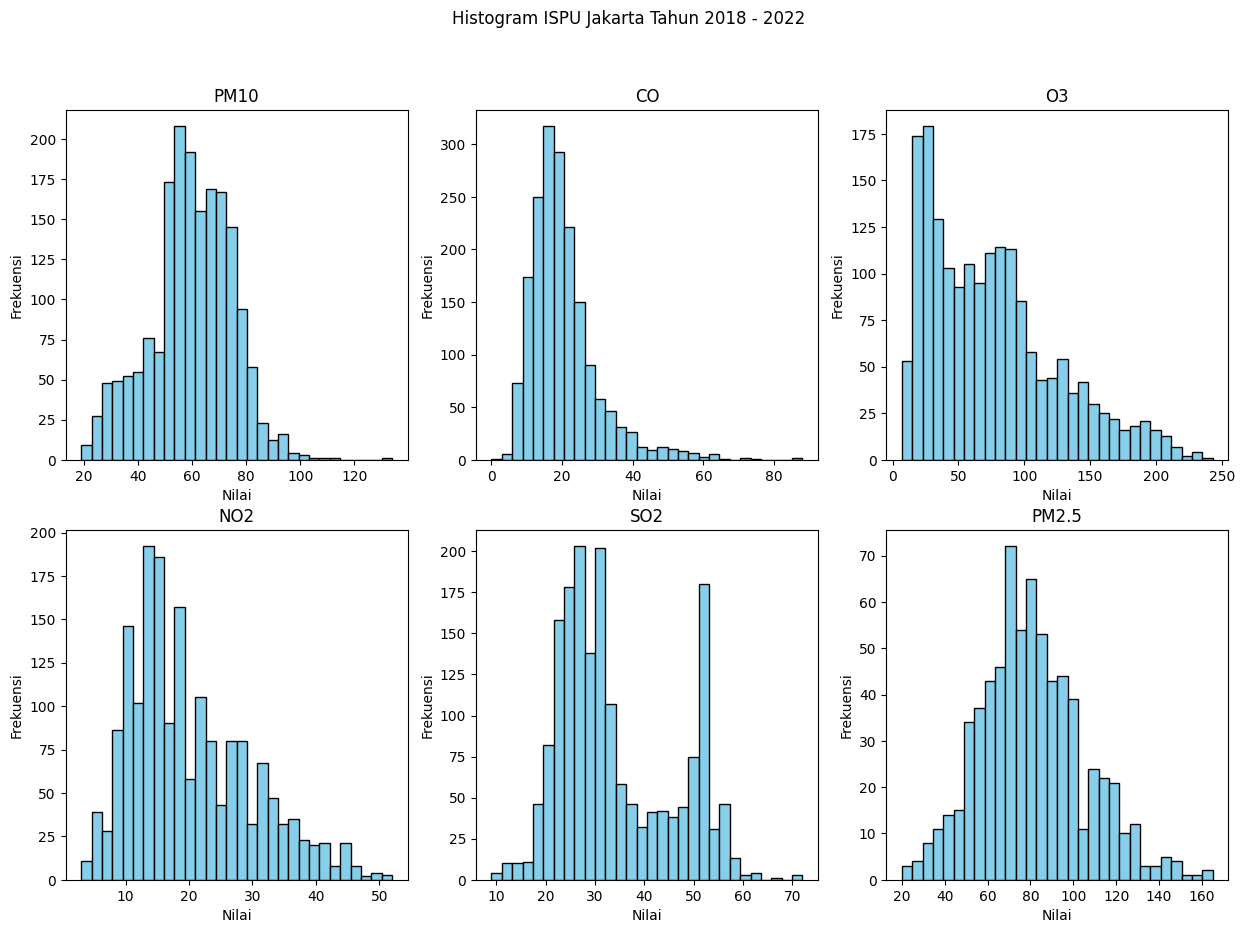

In [12]:
# Membuat gambar dengan grid subplots (2 baris dan 3 kolom) dengan ukuran gambar yang ditentukan
fig = plt.subplots(2, 3, figsize=(15,10))

# Membuat subplot pertama (berada di baris 1, kolom 1)
plt.subplot(2, 3, 1)
# Plot histogram dari data 'PM10' dari DataFrame 'ispu2'
plt.hist(ispu2['PM10'], bins=30, color='skyblue', edgecolor='black')
# Mengatur judul subplot ini menjadi 'PM10'
plt.title('PM10')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Membuat subplot kedua (berada di baris 1, kolom 2)
plt.subplot(2, 3, 2)
# Plot histogram dari data 'CO' dari DataFrame 'ispu2'
plt.hist(ispu2['CO'], bins=30, color='skyblue', edgecolor='black')
# Mengatur judul subplot ini menjadi 'CO'
plt.title('CO')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Membuat subplot ketiga (berada di baris 1, kolom 3)
plt.subplot(2, 3, 3)
# Plot histogram dari data 'O3' dari DataFrame 'ispu2'
plt.hist(ispu2['O3'], bins=30, color='skyblue', edgecolor='black')
# Mengatur judul subplot ini menjadi 'O3'
plt.title('O3')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Membuat subplot keempat (berada di baris 2, kolom 1)
plt.subplot(2, 3, 4)
# Plot histogram dari data 'NO2' dari DataFrame 'ispu2'
plt.hist(ispu2['NO2'], bins=30, color='skyblue', edgecolor='black')
# Mengatur judul subplot ini menjadi 'NO2'
plt.title('NO2')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Membuat subplot kelima (berada di baris 2, kolom 2)
plt.subplot(2, 3, 5)
# Plot histogram dari data 'SO2' dari DataFrame 'ispu2'
plt.hist(ispu2['SO2'], bins=30, color='skyblue', edgecolor='black')
# Mengatur judul subplot ini menjadi 'SO2'
plt.title('SO2')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Membuat subplot keenam (berada di baris 2, kolom 3)
plt.subplot(2, 3, 6)
# Plot histogram dari data 'PM25' dari DataFrame 'ispu4'
plt.hist(ispu4['PM25'], bins=30, color='skyblue', edgecolor='black')
# Mengatur judul subplot ini menjadi 'PM2.5'
plt.title('PM2.5')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Mengatur judul keseluruhan untuk gambar
plt.suptitle("Histogram ISPU Jakarta Tahun 2018 - 2022")
# Menampilkan plot
plt.show()


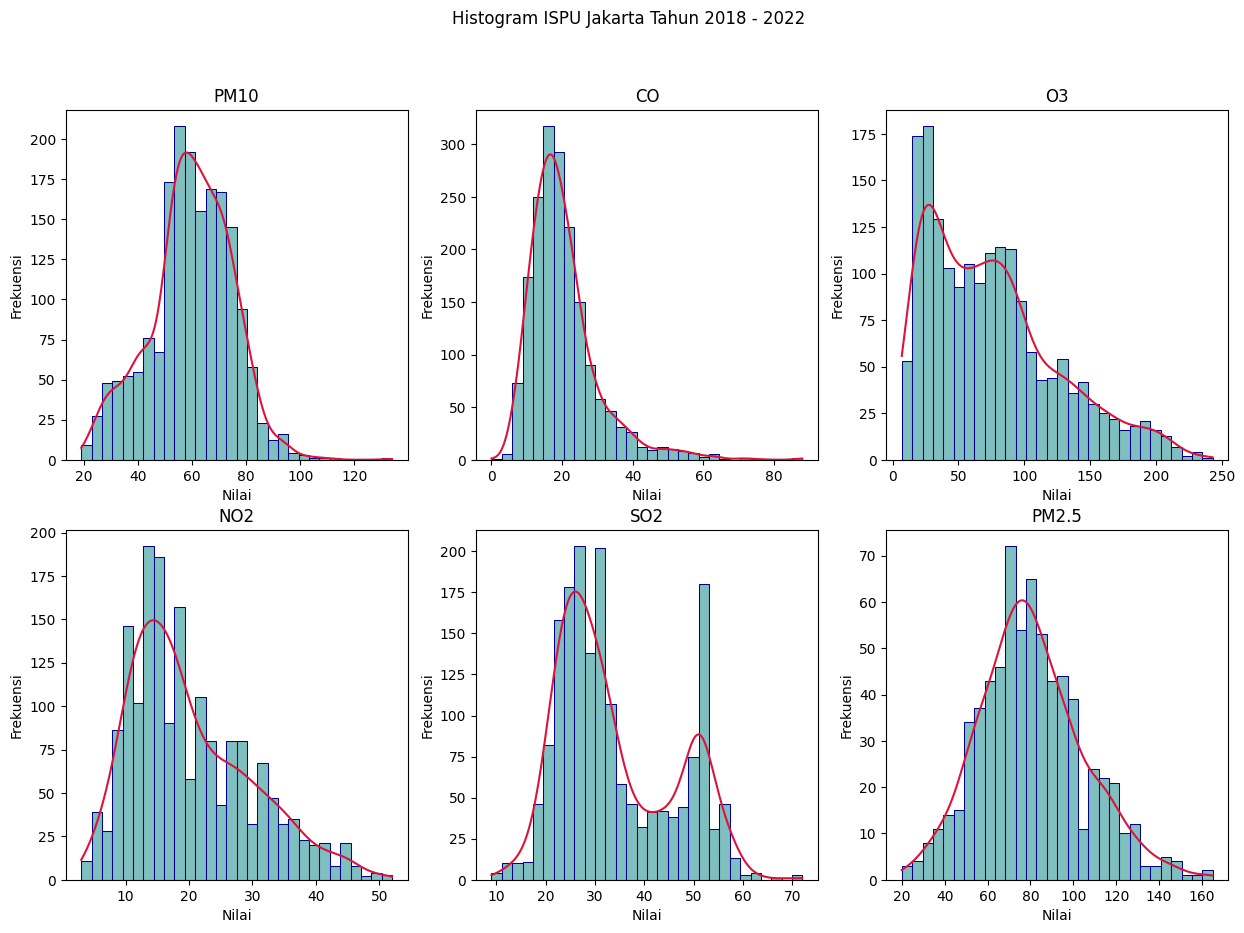

In [13]:
# Membuat gambar dengan grid subplots (2 baris dan 3 kolom) dengan ukuran gambar yang ditentukan
fig = plt.subplots(2, 3, figsize=(15,10))

# Membuat subplot pertama (berada di baris 1, kolom 1)
plt.subplot(2, 3, 1)
# Plot histogram dari data 'PM10' dari DataFrame 'ispu2' dengan KDE (Kernel Density Estimate)
ax = sns.histplot(ispu2['PM10'], bins=30, kde=True, color='teal', edgecolor='darkblue')
# Mengubah warna garis KDE menjadi merah
ax.lines[0].set_color('crimson')
# Mengatur judul subplot ini menjadi 'PM10'
plt.title('PM10')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Membuat subplot kedua (berada di baris 1, kolom 2)
plt.subplot(2, 3, 2)
# Plot histogram dari data 'CO' dari DataFrame 'ispu2' dengan KDE
ax = sns.histplot(ispu2['CO'], bins=30, kde=True, color='teal', edgecolor='darkblue')
# Mengubah warna garis KDE menjadi merah
ax.lines[0].set_color('crimson')
# Mengatur judul subplot ini menjadi 'CO'
plt.title('CO')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Membuat subplot ketiga (berada di baris 1, kolom 3)
plt.subplot(2, 3, 3)
# Plot histogram dari data 'O3' dari DataFrame 'ispu2' dengan KDE
ax = sns.histplot(ispu2['O3'], bins=30, kde=True, color='teal', edgecolor='darkblue')
# Mengubah warna garis KDE menjadi merah
ax.lines[0].set_color('crimson')
# Mengatur judul subplot ini menjadi 'O3'
plt.title('O3')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Membuat subplot keempat (berada di baris 2, kolom 1)
plt.subplot(2, 3, 4)
# Plot histogram dari data 'NO2' dari DataFrame 'ispu2' dengan KDE
ax = sns.histplot(ispu2['NO2'], bins=30, kde=True, color='teal', edgecolor='darkblue')
# Mengubah warna garis KDE menjadi merah
ax.lines[0].set_color('crimson')
# Mengatur judul subplot ini menjadi 'NO2'
plt.title('NO2')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Membuat subplot kelima (berada di baris 2, kolom 2)
plt.subplot(2, 3, 5)
# Plot histogram dari data 'SO2' dari DataFrame 'ispu2' dengan KDE
ax = sns.histplot(ispu2['SO2'], bins=30, kde=True, color='teal', edgecolor='darkblue')
# Mengubah warna garis KDE menjadi merah
ax.lines[0].set_color('crimson')
# Mengatur judul subplot ini menjadi 'SO2'
plt.title('SO2')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Membuat subplot keenam (berada di baris 2, kolom 3)
plt.subplot(2, 3, 6)
# Plot histogram dari data 'PM25' dari DataFrame 'ispu4' dengan KDE
ax = sns.histplot(ispu4['PM25'], bins=30, kde=True, color='teal', edgecolor='darkblue')
# Mengubah warna garis KDE menjadi merah
ax.lines[0].set_color('crimson')
# Mengatur judul subplot ini menjadi 'PM2.5'
plt.title('PM2.5')
# Memberi label sumbu y dengan 'Frekuensi'
plt.ylabel('Frekuensi')
# Memberi label sumbu x dengan 'Nilai'
plt.xlabel('Nilai')

# Mengatur judul keseluruhan untuk gambar
plt.suptitle("Histogram ISPU Jakarta Tahun 2018 - 2022")
# Menampilkan plot
plt.show()


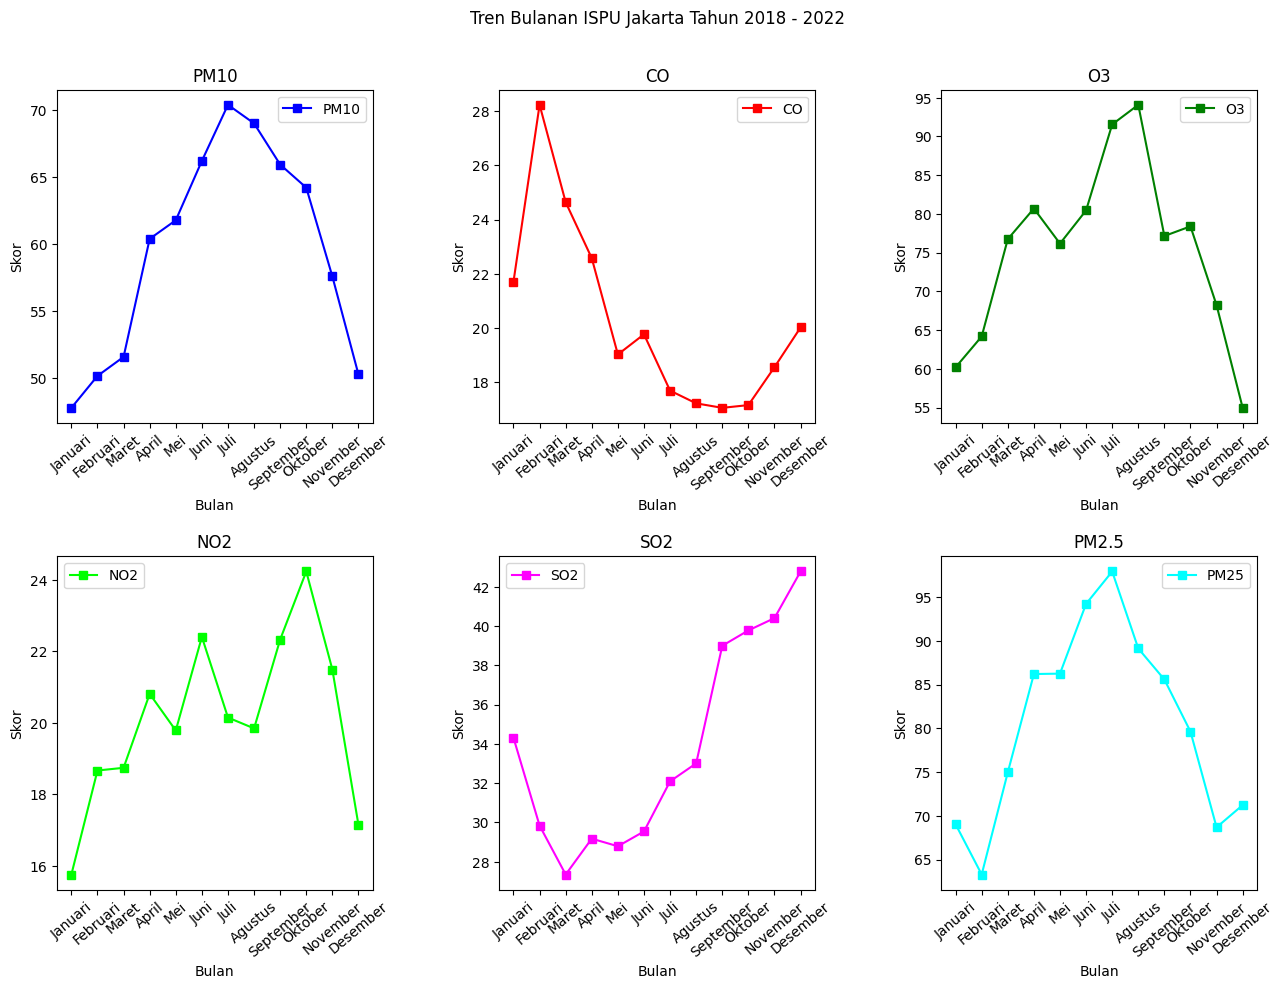

In [14]:
fig = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(left=0.1, bottom=0.1,right=0.9,top=0.9, wspace=0.4, hspace=0.4)
plt.subplot(2, 3, 1)
ispu2.groupby('Bulan')['PM10'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ],rotation=40)
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 3, 2)
ispu2.groupby('Bulan')['CO'].mean().plot(marker = 's', legend=True, color = 'red')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ], rotation=40)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 3, 3)
ispu2.groupby('Bulan')['O3'].mean().plot(marker = 's', legend=True, color = 'green')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei','Juni', 'Juli', 'Agustus', 'September' , 'Oktober', 'November', 'Desember' ],rotation=40)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 3, 4)
ispu2.groupby('Bulan')['NO2'].mean().plot(marker = 's', legend=True, color = 'lime')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ],rotation=40)
plt. title('NO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')


plt.subplot(2, 3, 5)
ispu2.groupby('Bulan')['SO2'].mean().plot(marker = 's', legend=True, color = 'magenta')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ], rotation=40)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 3, 6)
ispu4.groupby('Bulan')['PM25' ].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ], rotation=40)
plt.title('PM2.5')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.suptitle("Tren Bulanan ISPU Jakarta Tahun 2018 - 2022")
plt.show()

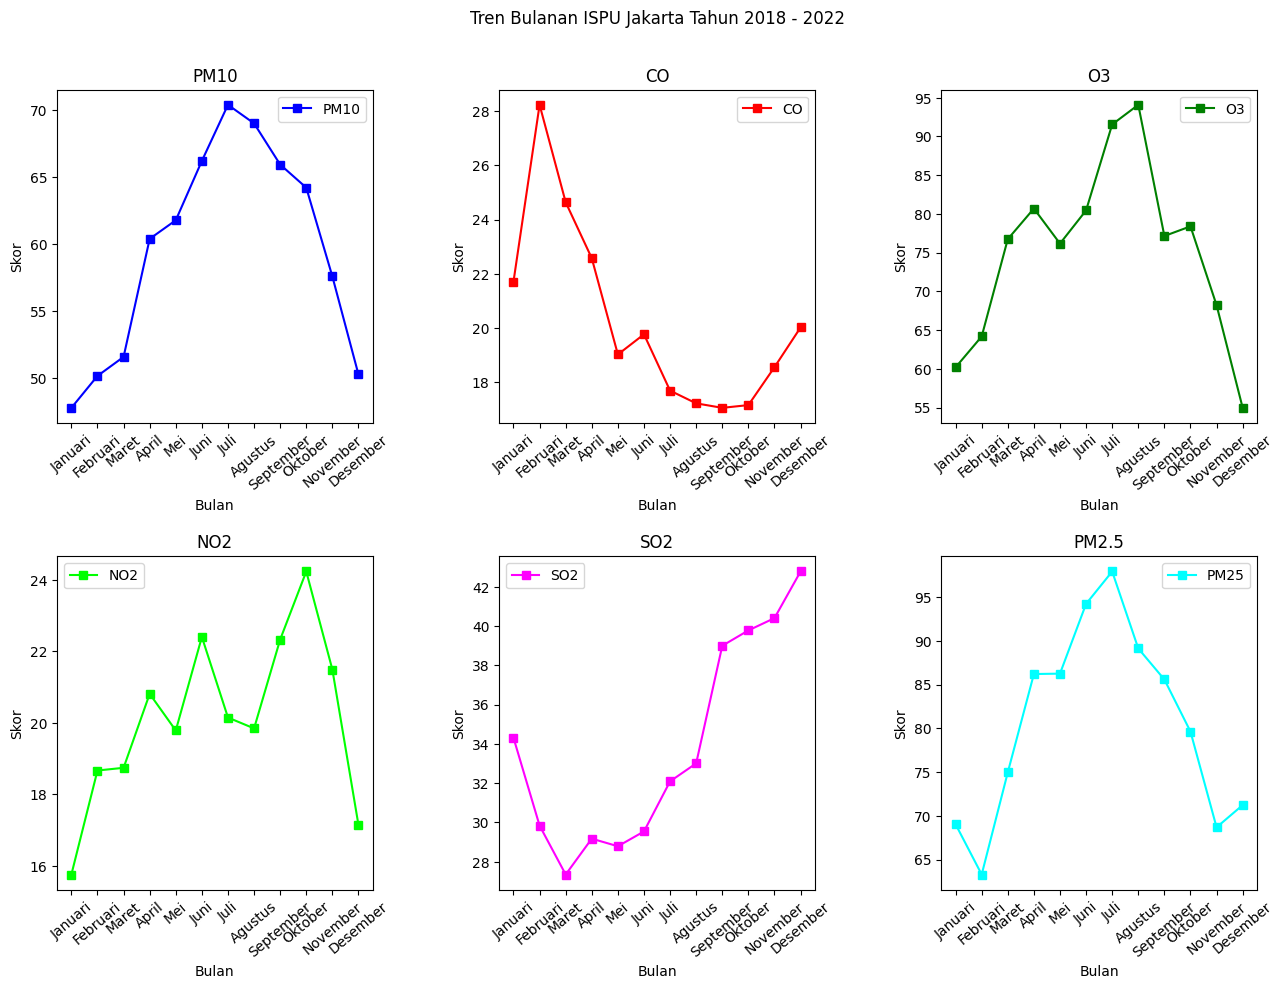

In [15]:
fig = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(left=0.1, bottom=0.1,right=0.9,top=0.9, wspace=0.4, hspace=0.4)
plt.subplot(2, 3, 1)
ispu2.groupby('Bulan' )['PM10' ].mean().plot(marker = 's', legend=True, color = 'blue')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret','April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ],rotation=40)
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 3, 2)
ispu2.groupby('Bulan' )['CO'].mean().plot(marker = 's', legend=True, color = 'red')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ], rotation=40)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 3, 3)
ispu2.groupby('Bulan')['O3'].mean().plot(marker = 's', legend=True, color = 'green')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ], rotation=40)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 3, 4)
ispu2.groupby('Bulan' )['NO2'].mean().plot(marker = 's', legend=True, color = 'lime')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ],rotation=40)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 3, 5)
ispu2.groupby('Bulan' )['SO2'].mean().plot(marker = 's', legend=True, color = 'magenta')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei','Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ],rotation=40)
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2, 3, 6)
ispu4.groupby('Bulan')['PM25' ].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember' ],rotation=40)
plt.title('PM2.5')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.suptitle("Tren Bulanan ISPU Jakarta Tahun 2018 - 2022")
plt.show()

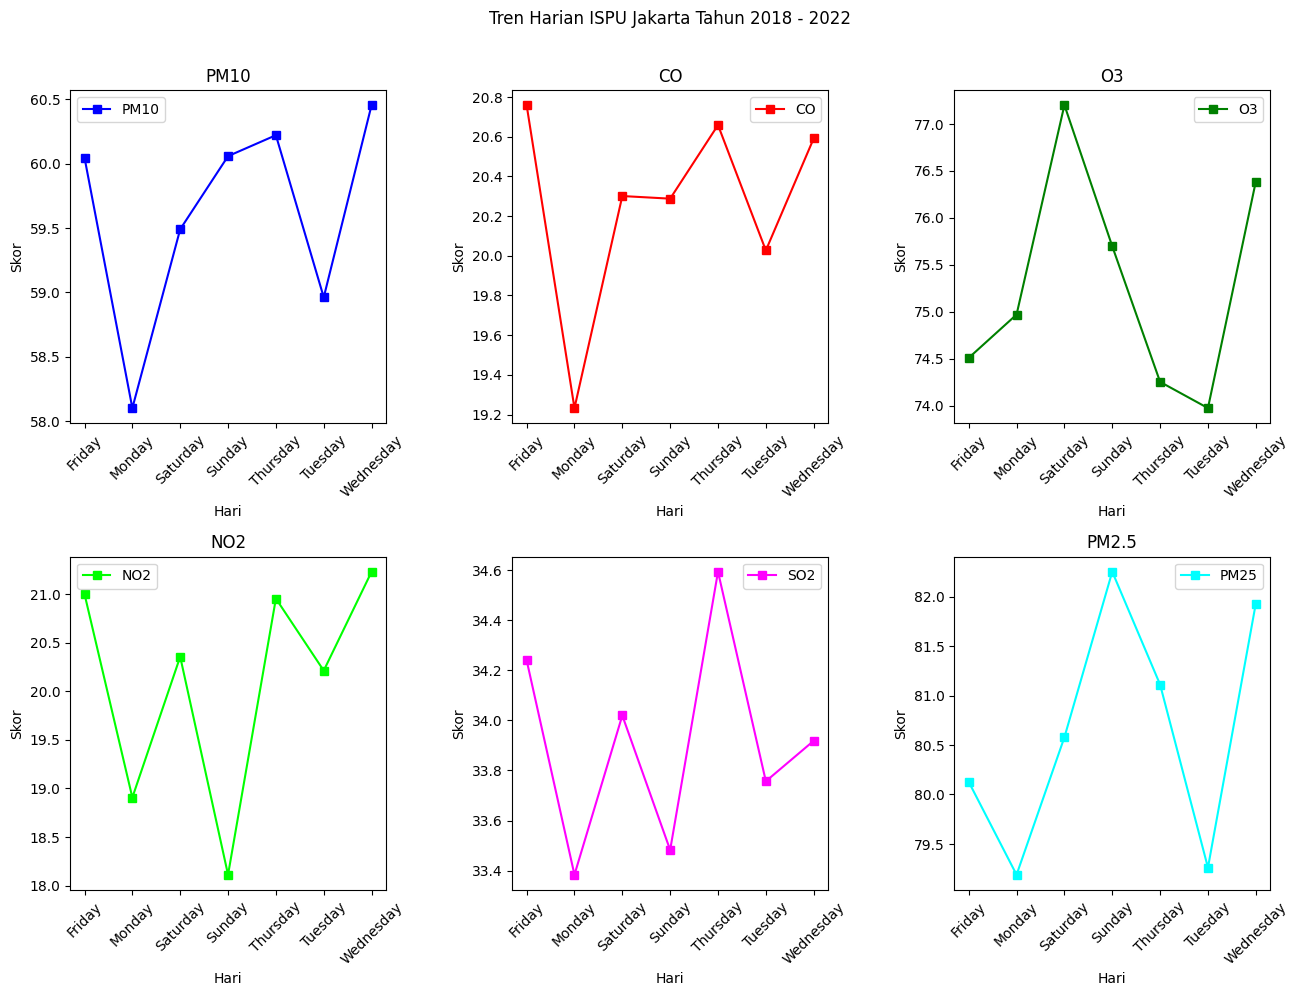

In [16]:
fig = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(left=0.1, bottom=0.1,right=0.9,top=0.9, wspace=0.4, hspace=0.4)
plt.subplot(2, 3, 1)
ispu2.groupby('Hari')['PM10'].mean().plot(marker = 's', legend=True, color = 'blue')
plt.xticks(rotation=45)
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 3, 2)
ispu2.groupby('Hari')['CO' ].mean().plot(marker = 's', legend=True, color = 'red')
plt.xticks(rotation=45)
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 3, 3)
ispu2.groupby('Hari')['O3'].mean().plot(marker = 's', legend=True, color = 'green')
plt.xticks(rotation=45)
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 3, 4)
ispu2.groupby('Hari')['NO2' ].mean().plot(marker = 's', legend=True, color = 'lime')
plt.xticks(rotation=45)
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 3, 5)
ispu2.groupby('Hari')['SO2' ].mean().plot(marker = 's', legend=True, color = 'magenta')
plt.xticks(rotation=45)

plt.ylabel('Skor')
plt.xlabel('Hari')

plt.subplot(2, 3, 6)
ispu4.groupby('Hari')['PM25'].mean().plot(marker = 's', legend=True, color = 'aqua')
plt.xticks(rotation = 45)
plt.title('PM2.5')
plt.ylabel('Skor')
plt.xlabel('Hari')

plt.suptitle("Tren Harian ISPU Jakarta Tahun 2018 - 2022")
plt.show()



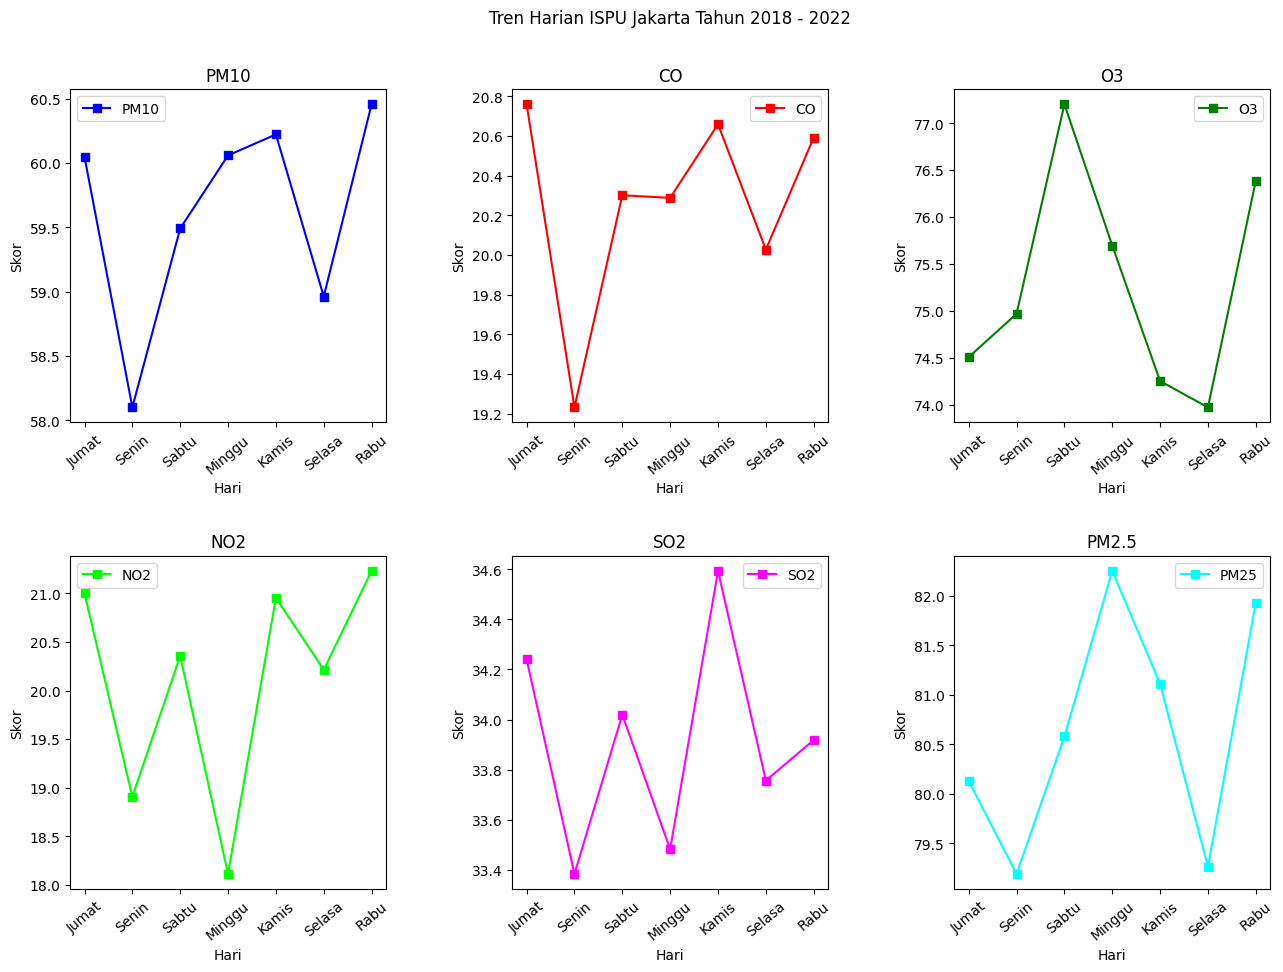

In [17]:
# Membuat gambar dengan grid subplots (2 baris dan 3 kolom) dengan ukuran gambar yang ditentukan
fig = plt.subplots(2, 3, figsize=(15,10))

# Mengatur spasi antara subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Membuat subplot pertama (berada di baris 1, kolom 1)
plt.subplot(2, 3, 1)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'PM10', kemudian memplotnya
ispu2.groupby('Hari')['PM10'].mean().plot(marker='s', legend=True, color='blue')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'PM10'
plt.title('PM10')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot kedua (berada di baris 1, kolom 2)
plt.subplot(2, 3, 2)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'CO', kemudian memplotnya
ispu2.groupby('Hari')['CO'].mean().plot(marker='s', legend=True, color='red')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'CO'
plt.title('CO')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot ketiga (berada di baris 1, kolom 3)
plt.subplot(2, 3, 3)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'O3', kemudian memplotnya
ispu2.groupby('Hari')['O3'].mean().plot(marker='s', legend=True, color='green')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'O3'
plt.title('O3')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot keempat (berada di baris 2, kolom 1)
plt.subplot(2, 3, 4)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'NO2', kemudian memplotnya
ispu2.groupby('Hari')['NO2'].mean().plot(marker='s', legend=True, color='lime')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'NO2'
plt.title('NO2')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot kelima (berada di baris 2, kolom 2)
plt.subplot(2, 3, 5)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'SO2', kemudian memplotnya
ispu2.groupby('Hari')['SO2'].mean().plot(marker='s', legend=True, color='magenta')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'SO2'
plt.title('SO2')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot keenam (berada di baris 2, kolom 3)
plt.subplot(2, 3, 6)
# Mengelompokkan data 'ispu4' berdasarkan 'Hari' dan menghitung rata-rata 'PM25', kemudian memplotnya
ispu4.groupby('Hari')['PM25'].mean().plot(marker='s', legend=True, color='aqua')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'PM2.5'
plt.title('PM2.5')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Mengatur judul keseluruhan untuk gambar
plt.suptitle("Tren Harian ISPU Jakarta Tahun 2018 - 2022")
# Menampilkan plot
plt.show()


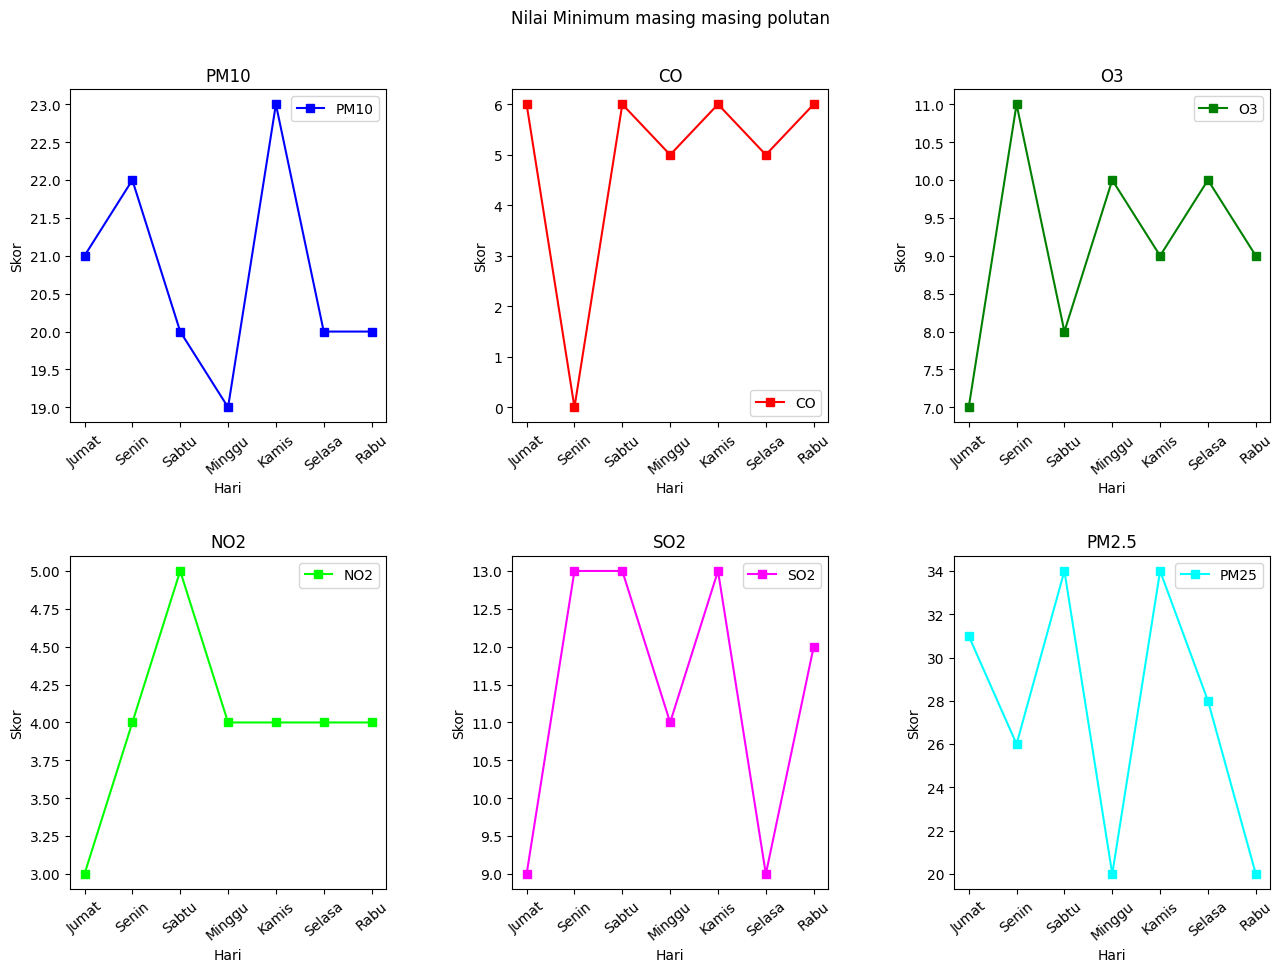

In [18]:
# Membuat gambar dengan grid subplots (2 baris dan 3 kolom) dengan ukuran gambar yang ditentukan
fig = plt.subplots(2, 3, figsize=(15,10))

# Mengatur spasi antara subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Membuat subplot pertama (berada di baris 1, kolom 1)
plt.subplot(2, 3, 1)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'PM10', kemudian memplotnya
ispu2.groupby('Hari')['PM10'].min().plot(marker='s', legend=True, color='blue')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'PM10'
plt.title('PM10')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot kedua (berada di baris 1, kolom 2)
plt.subplot(2, 3, 2)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'CO', kemudian memplotnya
ispu2.groupby('Hari')['CO'].min().plot(marker='s', legend=True, color='red')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'CO'
plt.title('CO')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot ketiga (berada di baris 1, kolom 3)
plt.subplot(2, 3, 3)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'O3', kemudian memplotnya
ispu2.groupby('Hari')['O3'].min().plot(marker='s', legend=True, color='green')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'O3'
plt.title('O3')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot keempat (berada di baris 2, kolom 1)
plt.subplot(2, 3, 4)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'NO2', kemudian memplotnya
ispu2.groupby('Hari')['NO2'].min().plot(marker='s', legend=True, color='lime')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'NO2'
plt.title('NO2')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot kelima (berada di baris 2, kolom 2)
plt.subplot(2, 3, 5)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'SO2', kemudian memplotnya
ispu2.groupby('Hari')['SO2'].min().plot(marker='s', legend=True, color='magenta')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'SO2'
plt.title('SO2')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot keenam (berada di baris 2, kolom 3)
plt.subplot(2, 3, 6)
# Mengelompokkan data 'ispu4' berdasarkan 'Hari' dan menghitung rata-rata 'PM25', kemudian memplotnya
ispu4.groupby('Hari')['PM25'].min().plot(marker='s', legend=True, color='aqua')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'PM2.5'
plt.title('PM2.5')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Mengatur judul keseluruhan untuk gambar
plt.suptitle("Nilai Minimum masing masing polutan")
# Menampilkan plot
plt.show()


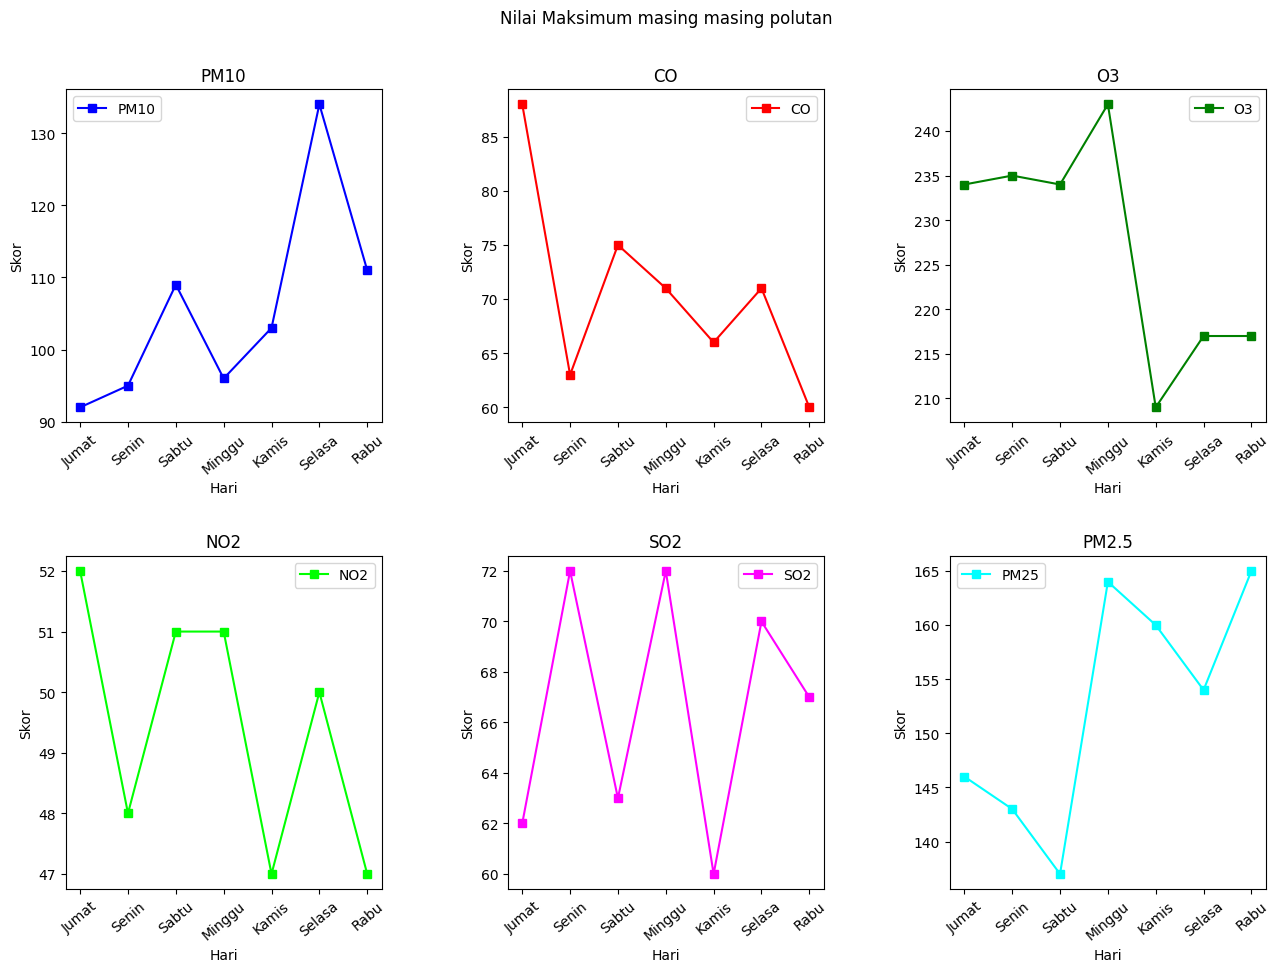

In [19]:
# Membuat gambar dengan grid subplots (2 baris dan 3 kolom) dengan ukuran gambar yang ditentukan
fig = plt.subplots(2, 3, figsize=(15,10))

# Mengatur spasi antara subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Membuat subplot pertama (berada di baris 1, kolom 1)
plt.subplot(2, 3, 1)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'PM10', kemudian memplotnya
ispu2.groupby('Hari')['PM10'].max().plot(marker='s', legend=True, color='blue')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'PM10'
plt.title('PM10')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot kedua (berada di baris 1, kolom 2)
plt.subplot(2, 3, 2)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'CO', kemudian memplotnya
ispu2.groupby('Hari')['CO'].max().plot(marker='s', legend=True, color='red')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'CO'
plt.title('CO')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot ketiga (berada di baris 1, kolom 3)
plt.subplot(2, 3, 3)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'O3', kemudian memplotnya
ispu2.groupby('Hari')['O3'].max().plot(marker='s', legend=True, color='green')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'O3'
plt.title('O3')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot keempat (berada di baris 2, kolom 1)
plt.subplot(2, 3, 4)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'NO2', kemudian memplotnya
ispu2.groupby('Hari')['NO2'].max().plot(marker='s', legend=True, color='lime')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'NO2'
plt.title('NO2')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot kelima (berada di baris 2, kolom 2)
plt.subplot(2, 3, 5)
# Mengelompokkan data 'ispu2' berdasarkan 'Hari' dan menghitung rata-rata 'SO2', kemudian memplotnya
ispu2.groupby('Hari')['SO2'].max().plot(marker='s', legend=True, color='magenta')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'SO2'
plt.title('SO2')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Membuat subplot keenam (berada di baris 2, kolom 3)
plt.subplot(2, 3, 6)
# Mengelompokkan data 'ispu4' berdasarkan 'Hari' dan menghitung rata-rata 'PM25', kemudian memplotnya
ispu4.groupby('Hari')['PM25'].max().plot(marker='s', legend=True, color='aqua')
# Mengatur label x-axis dengan nama hari dalam bahasa Indonesia dan rotasi 40 derajat
plt.xticks([0,1,2,3,4,5,6], ['Jumat', 'Senin', 'Sabtu', 'Minggu', 'Kamis', 'Selasa', 'Rabu'], rotation=40)
# Mengatur judul subplot ini menjadi 'PM2.5'
plt.title('PM2.5')
# Memberi label sumbu y dengan 'Skor'
plt.ylabel('Skor')
# Memberi label sumbu x dengan 'Hari'
plt.xlabel('Hari')

# Mengatur judul keseluruhan untuk gambar
plt.suptitle("Nilai Maksimum masing masing polutan")
# Menampilkan plot
plt.show()


In [20]:
#PM10

#Min: Senin
#Max: Selasa
#PM2.5
#Data kosong dan tidak cukup untuk nentuin nilai minimum dan maksimumnya
#SO2

#Min: Senin
#Max: Minggu
#CO

#Min: Jumat
#Max: Rabu
#O3

#Min: Rabu
#Max: Sabtu
#NO2

#Min: Jumat
#Max: Senin